This Notebook is designed to be an alternative to the DESaccess server (https://des.ncsa.illinois.edu/desaccess/). You need to have an account to use the server, but it can be useful to troubleshoot any issues. 
https://arxiv.org/abs/1912.06254

In [3]:
#get all required packages
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs import utils
import numpy as np 
from astroquery.skyview import SkyView
import astropy.units as u
from astropy.coordinates import SkyCoord
import glob, os, sys
from astropy.nddata import Cutout2D
import math
import cmasher as cmr
from astropy.visualization import lupton_rgb
from reproject.mosaicking import find_optimal_celestial_wcs
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd

In [4]:
#user parameters
bands=['g','i','r'] # choose THREE of ['Y','g','i','r','z'] to be R G B respectively

# area of sky you wish to cover. 
# Formats HHMM and DDMM for RA and Dec respectively 
ra_min=1940
ra_max=2220
dec_min=-6200
dec_max=-4800

In [37]:
# list of DES tiles following their naming convension (as of DR2)
DEStiles=np.genfromtxt('DES_tiles.txt',dtype='str')
print(DEStiles.shape)
# source list for cutouts
sources=np.genfromtxt('source_list.txt',dtype='str')
nsrc=len(sources)

(10169,)


In [9]:
for i in range (0,nsrc):
    src=sources[i,0] #Jhhmmss+ddmmss
    fov=float(sources[i,1]) #arcmins
    coords=SkyCoord.from_name(src)
    
    #get cutout dims from input paramters
    deg_edge=fov/60 # get it in degrees
    src_ra_max=float((coords.ra/u.degree)+deg_edge) 
    src_ra_min=float((coords.ra/u.degree)-deg_edge) 
    src_dec_max=float((coords.dec/u.degree)+deg_edge) 
    src_dec_min=float((coords.dec/u.degree)-deg_edge) 
    

-55.69209333333333
-53.769753333333334
-52.995900000000006


In [10]:
test=np.genfromtxt('DES_tiles_dims.txt',dtype='str')

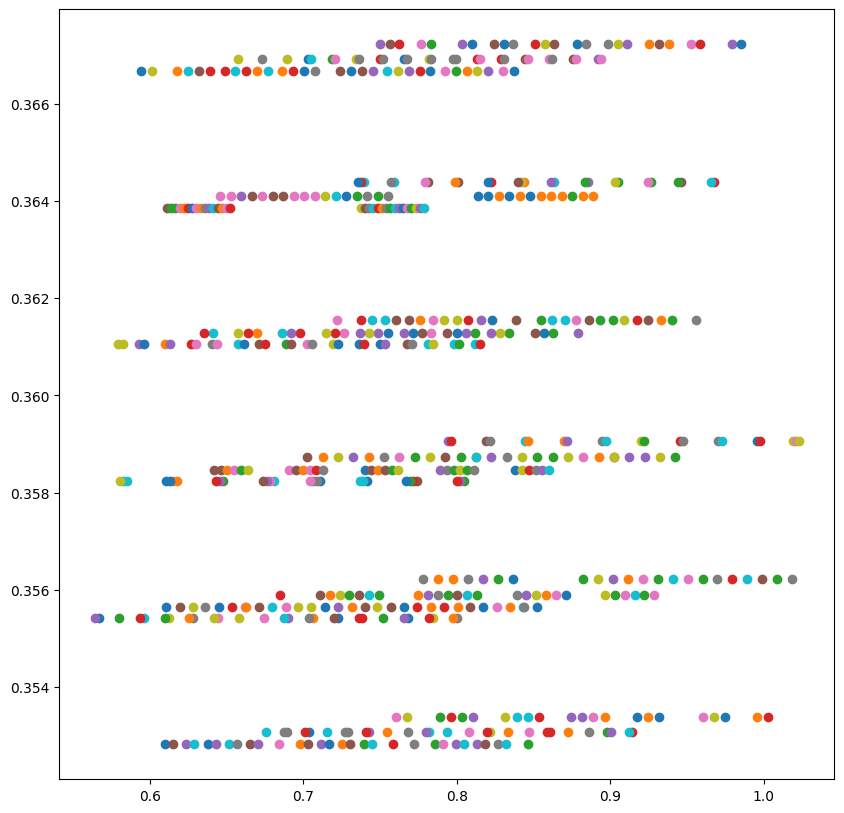

In [35]:
plt.figure(figsize=(10,10))
for i in range(0,555):
    tile=test[i,0]
    tile_ra=(360./24)*(float(tile[3:5])+float(tile[5:7])/60)
    if tile[7]=='-':
        tile_dec=float(tile[7:10])-(float(tile[10:12])/60.)
    elif tile[7]=='+':
        tile_dec=float(tile[7:10])+(float(tile[10:12])/60.)
    else:
        print("error")
    
    ra_min=float(test[i,1])
    ra_max=float(test[i,2])
    dec_max=float(test[i,3])
    dec_min=float(test[i,4])
    
    #plt.scatter(ra_min-tile_ra,dec_min-tile_dec)
    #plt.scatter(ra_max-tile_ra,dec_min-tile_dec)
    #plt.scatter(ra_min-tile_ra,dec_max-tile_dec)
    plt.scatter(ra_max-tile_ra,dec_max-tile_dec)
#plt.axhline(y=0)
#plt.axvline(x=0)
plt.show()

In [39]:
%matplotlib inline
import easyaccess as ea
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
con=ea.connect('desoper')



Error in DES_SERVICES config file, creating a new one...
File might not exists or is not configured correctly


Adding section db-desoper to DES_SERVICES file

